In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [466]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [514]:
print(train.shape)
print(test.shape)

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,0,3,male,22.0,7.2500,False,True,False,True
1,1,1,female,38.0,71.2833,False,False,False,True


In [468]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [469]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [470]:
train['Embarked'].fillna('S',inplace=True)

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_15980\535005595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)


In [471]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_15980\4105841904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [472]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [473]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [474]:
train['Age'][np.isnan(train['Age'])]=gen_age

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_15980\283863123.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][np.isnan(train['Age'])]=gen_age
C:\Users\Kaushik\AppData\Local\Temp\ipykernel_15980\283863123.py:1: SettingWithCop

In [475]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [476]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)

In [477]:
test['Age'][np.isnan(test['Age'])]=gen_age1

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_15980\2126762493.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][np.isnan(test['Age'])]=gen_age1
C:\Users\Kaushik\AppData\Local\Temp\ipykernel_15980\2126762493.py:1: SettingWithCo

In [478]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [479]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

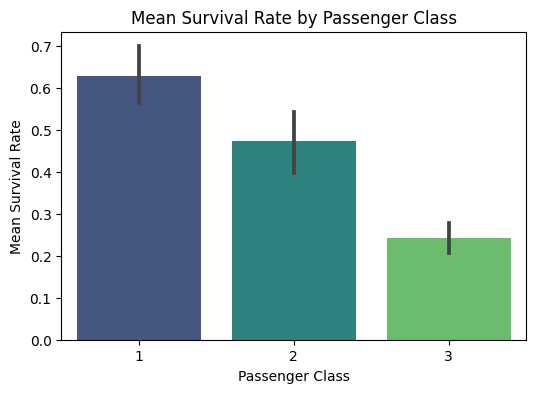

In [480]:
grouped_data = train[['Pclass','Survived']].groupby('Pclass').mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=train["Pclass"], y=train['Survived'], data=train, palette='viridis')
plt.title('Mean Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')
plt.show()




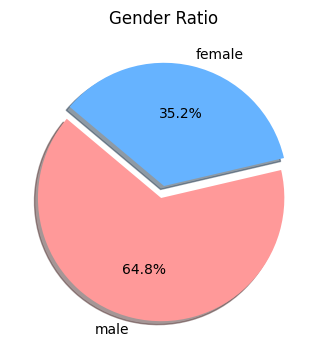

In [481]:
# train[['Sex','Survived']].groupby('Sex').mean()
sex_counts = train['Sex'].value_counts()
sex_counts

# Prepare data for the pie chart
labels = sex_counts.index
sizes = sex_counts.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (female)

# # Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Gender Ratio')
plt.show()


In [482]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


C:\Users\Kaushik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


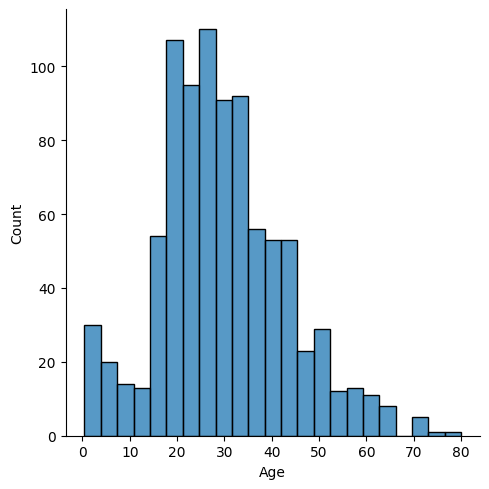

In [483]:
sns.displot(train['Age'])

<Axes: >

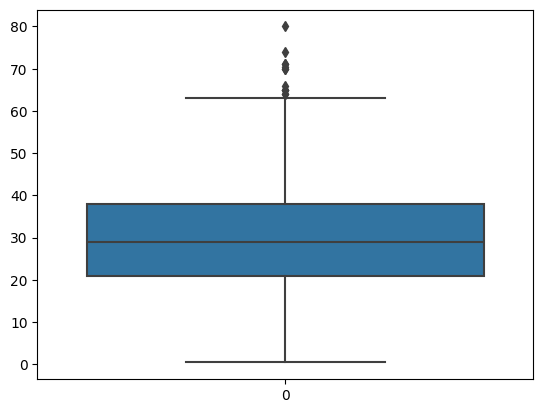

In [484]:
sns.boxplot(train['Age'])

In [485]:
train[train['Age']>75]['Survived'].value_counts()

Survived
1    1
Name: count, dtype: int64

C:\Users\Kaushik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kaushik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kaushik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

Text(0.5, 1.0, 'live')

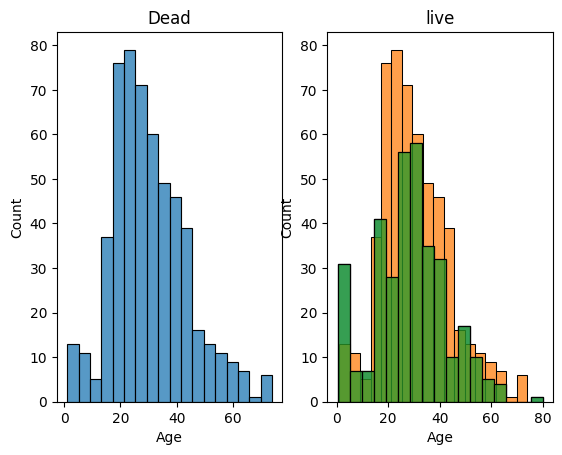

In [486]:
# plt.subplots(figsize=(15,4))

plt.subplot(1, 2, 1) 
sns.histplot(train[train['Survived']==0]['Age'],kde=False)
plt.title("Dead")

plt.subplot(1, 2, 2) 
sns.histplot(train[train['Survived']==1]['Age'],kde=False)
plt.title("live")



sns.histplot(train[train['Survived']==0]['Age'],kde=False)
plt.title("Dead")

sns.histplot(train[train['Survived']==1]['Age'],kde=False)
plt.title("live")


In [487]:
passengerId=test['PassengerId'].values

In [619]:
train.drop(columns=['PassengerId','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Ticket'],inplace=True)

,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,family_size_Large,family_size_Small,Sex_male
0,0,3,22.0,7.25,0,1,0,1,1


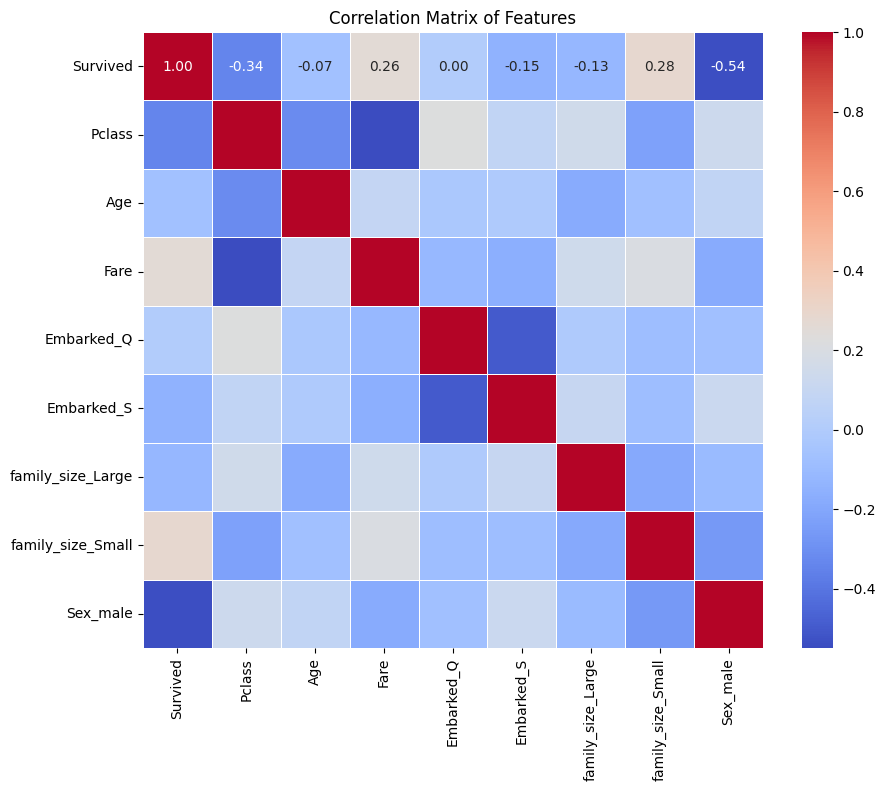

In [624]:
corr_matrix = train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [489]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

C:\Users\Kaushik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

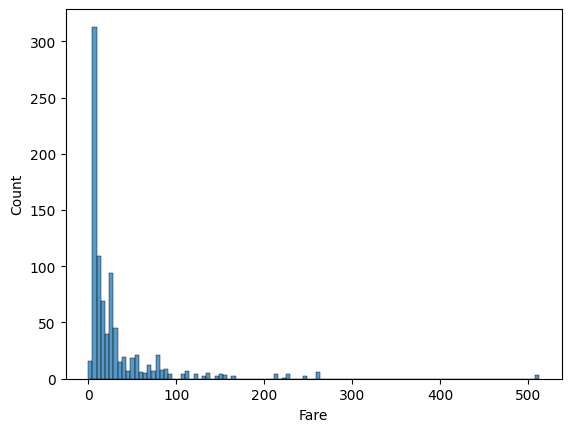

In [490]:
sns.histplot(train['Fare'])

<Axes: >

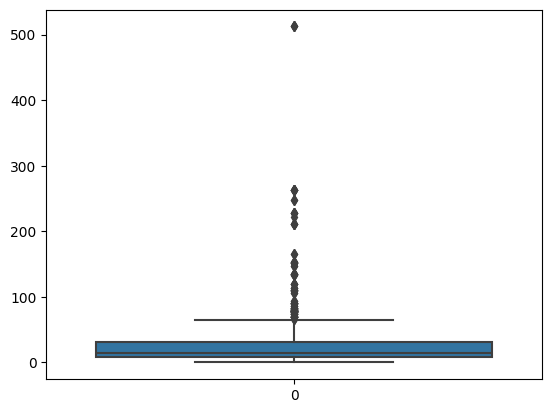

In [491]:
sns.boxplot(train['Fare'])

In [492]:
train[train['Fare']>400]['Survived'].value_counts()

Survived
1    3
Name: count, dtype: int64

C:\Users\Kaushik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kaushik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

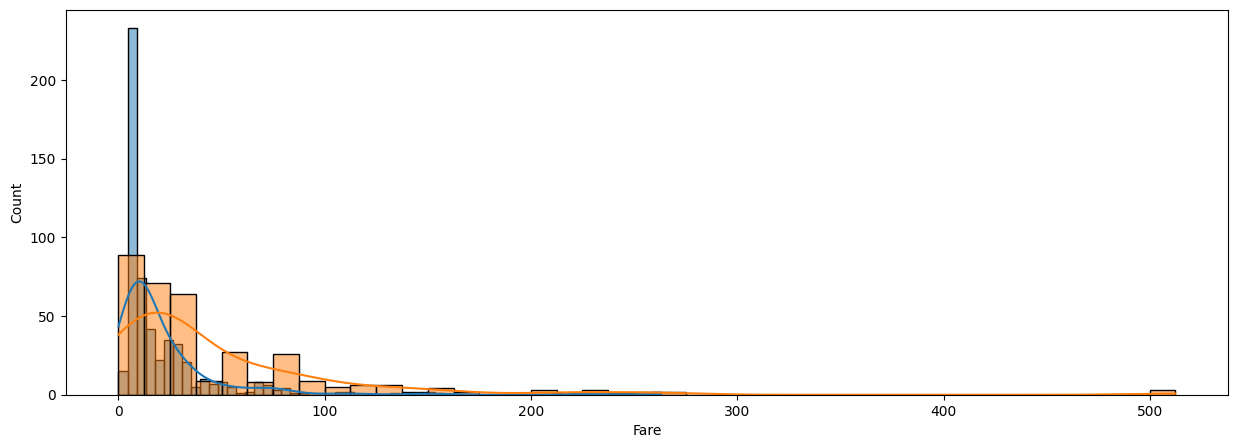

In [493]:
plt.subplots(figsize=(15,5))
sns.histplot(train[train['Survived']==0]['Fare'], kde="False")
sns.histplot(train[train['Survived']==1]['Fare'], kde="False")

In [494]:
# Don't delete this unless its 1st Jan
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [495]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [513]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,0,3,male,22.0,7.2500,False,True,False,True
1,1,1,female,38.0,71.2833,False,False,False,True


In [497]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [498]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

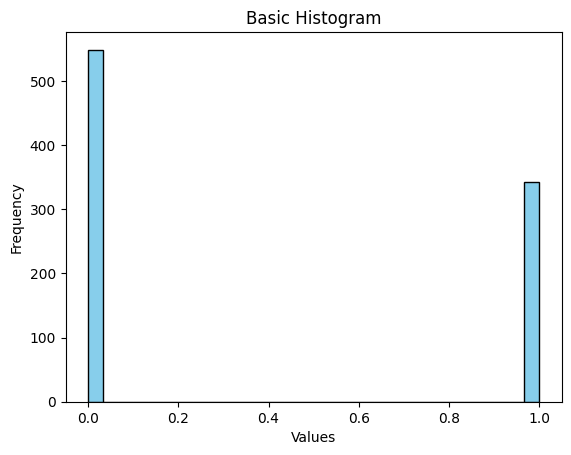

In [499]:
train[['family','Survived']].groupby('family').mean()
# data = np.random.randn(1000)
 
# Plotting a basic histogram
plt.hist(train["Survived"], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()


In [500]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [501]:
family_size(5)

'Large'

In [502]:
train['family_size']=train['family'].apply(family_size)

In [548]:
test['family_size']=test['family'].apply(family_size)

In [546]:

train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)
train.shape

(891, 9)

In [508]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [549]:
# final=train.append(test)
final = pd.concat([train, test], ignore_index=True)


(1309, 12)

In [510]:
# final.shape
# print(final.columns)
# print(final["Pclass_3"].values)

In [538]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)
final.shape

(1309, 10)

In [540]:

bool_cols = ['Sex_male', 'Embarked_Q', 'Embarked_S', 'family_size_Large', 'family_size_Small']

train[bool_cols] = train[bool_cols].astype(int)

train.head(1)
# train.shape

(891, 9)

In [610]:
# Xf=train.head(1).values
x = pd.DataFrame(train.head(418))
x.head(10)
x.head(10)
x.drop(columns=["Survived"],inplace=True)
# x.shape

In [558]:
X= train.drop(columns=["Survived"])
y=train["Survived"]
# print(train.columns)

X.head(10)

,Pclass,Age,Fare,Embarked_Q,Embarked_S,family_size_Large,family_size_Small,Sex_male
0,3,22.0,7.2500,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,1,0
2,3,26.0,7.9250,0,1,0,0,0
3,1,35.0,53.1000,0,1,0,1,0
4,3,35.0,8.0500,0,1,0,0,1
5,3,38.0,8.4583,1,0,0,0,1
6,1,54.0,51.8625,0,1,0,0,1
7,3,2.0,21.0750,0,1,1,0,1
8,3,27.0,11.1333,0,1,0,1,0
9,2,14.0,30.0708,0,0,0,1,0


,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,family_size_Large,family_size_Small,Sex_male
0,0,3,22.0,7.25,0,1,0,1,1


In [544]:
X.shape

(891, 8)

In [ ]:
y.shape

(891,)

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,0,3,22.0,7.25,1,0,1,0,1


In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [521]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,0,3,22.0,7.25,1,0,1,0,1


In [522]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [523]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred.shape

(179,)

In [ ]:
y_test.shape

(179,)

In [524]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7486033519553073

In [611]:
yf=clf.predict(x)
yf

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [572]:
yf.shape

(10,)

In [612]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [613]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [614]:
accuracy_score(y_test, y_pred_rf)


0.8100558659217877

In [615]:
yf=clf.predict(x)
yf

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [616]:
submission=pd.DataFrame()

In [617]:
submission['PassengerId']=passengerId
submission['Survived_Predict']=yf

In [618]:
submission.to_csv('submission.csv', index=False)